In [3]:
# Load important tools
import pandas as pd
import matplotlib.pyplot as plt

# Show graphs inside the notebook
%matplotlib inline


In [7]:
import zipfile

# Unzip the file
with zipfile.ZipFile('/content/archive.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')


In [8]:
import pandas as pd

# Load the main movie dataset
df = pd.read_csv('/content/tmdb_5000_movies.csv')

# Display the first few rows
df.head()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


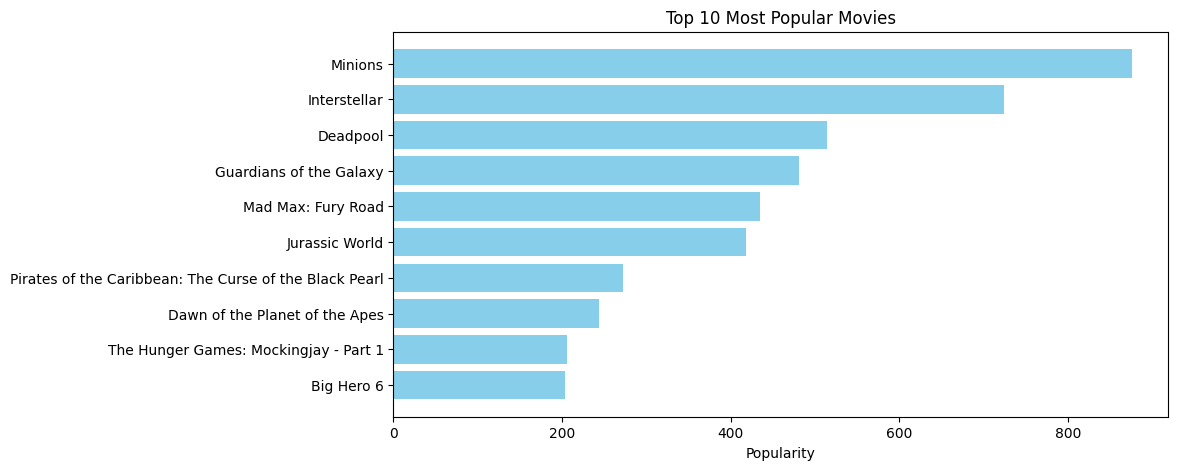

In [9]:
# Sort by popularity and show top 10 movies
top_popular = df.sort_values('popularity', ascending=False).head(10)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.barh(top_popular['title'], top_popular['popularity'], color='skyblue')
plt.xlabel("Popularity")
plt.title("Top 10 Most Popular Movies")
plt.gca().invert_yaxis()  # highest at the top
plt.show()


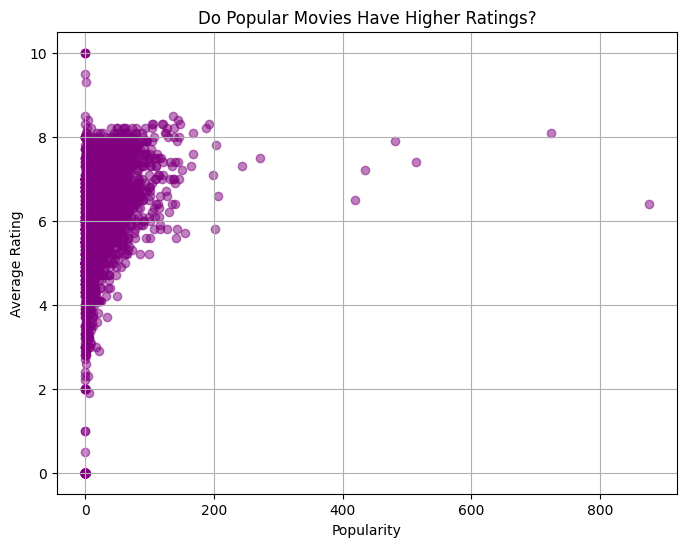

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(df['popularity'], df['vote_average'], alpha=0.5, color='purple')
plt.xlabel("Popularity")
plt.ylabel("Average Rating")
plt.title("Do Popular Movies Have Higher Ratings?")
plt.grid(True)
plt.show()


In [11]:
import ast

# Convert string to actual list and extract first genre name
df['main_genre'] = df['genres'].apply(lambda x: ast.literal_eval(x)[0]['name'] if len(ast.literal_eval(x)) > 0 else 'None')

# Show a few rows
df[['title', 'main_genre']].head()


,title,main_genre
0,Avatar,Action
1,Pirates of the Caribbean: At World's End,Adventure
2,Spectre,Action
3,The Dark Knight Rises,Action
4,John Carter,Action


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('title').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('main_genre').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['main_genre'].value_counts()
    for x_label, grp in _df_2.groupby('title')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('title')
_ = plt.ylabel('main_genre')

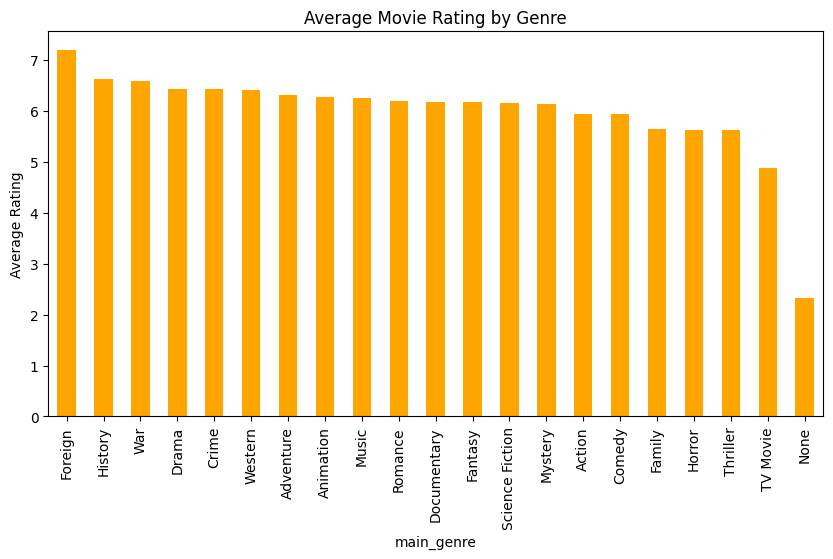

In [12]:
# Group by genre and take average rating
genre_ratings = df.groupby('main_genre')['vote_average'].mean().sort_values(ascending=False)

# Plot
genre_ratings.plot(kind='bar', figsize=(10,5), color='orange')
plt.ylabel("Average Rating")
plt.title("Average Movie Rating by Genre")
plt.show()



In [13]:
# Convert release_date to datetime format
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Extract the year into a new column
df['release_year'] = df['release_date'].dt.year

# Show a few rows
df[['title', 'release_date', 'release_year']].head()


,title,release_date,release_year
0,Avatar,2009-12-10,2009.0
1,Pirates of the Caribbean: At World's End,2007-05-19,2007.0
2,Spectre,2015-10-26,2015.0
3,The Dark Knight Rises,2012-07-16,2012.0
4,John Carter,2012-03-07,2012.0


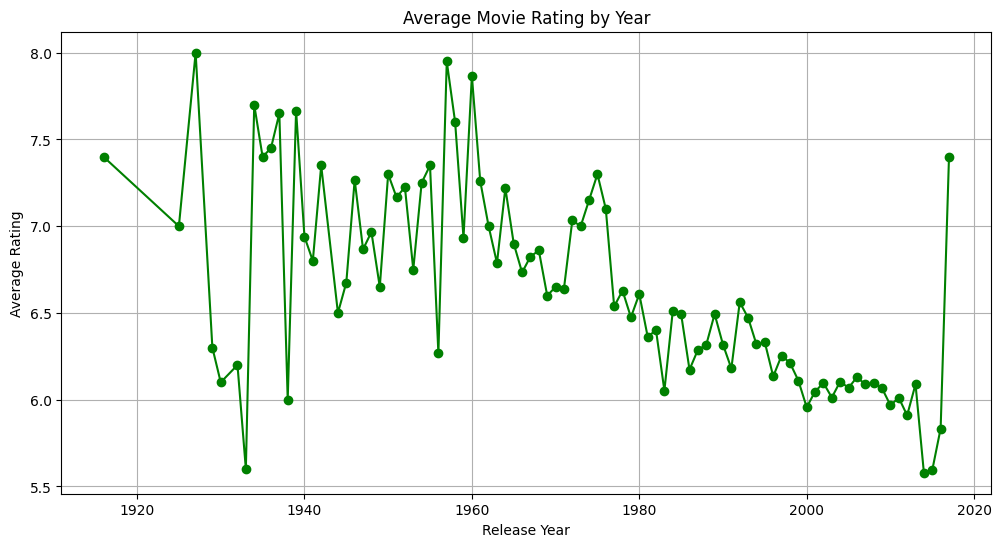

In [14]:
# Group by year and calculate average rating
yearly_ratings = df.groupby('release_year')['vote_average'].mean()

# Plot
plt.figure(figsize=(12,6))
plt.plot(yearly_ratings.index, yearly_ratings.values, marker='o', color='green')
plt.xlabel("Release Year")
plt.ylabel("Average Rating")
plt.title("Average Movie Rating by Year")
plt.grid(True)
plt.show()


In [15]:
print("✅ Project Summary:")
print("• Analyzed TMDB movie dataset with 5000+ movies")
print("• Found top popular movies")
print("• Compared popularity vs ratings")
print("• Identified top-rated genres")
print("• Analyzed rating trends over years")


✅ Project Summary:
• Analyzed TMDB movie dataset with 5000+ movies
• Found top popular movies
• Compared popularity vs ratings
• Identified top-rated genres
• Analyzed rating trends over years
